In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
file_2010_2011= "data/online_retail_II.csv"
file_2009_2010 = "data/online_retail_II2.csv"

# Load datasets
data_2009_2010 = pd.read_csv(file_2009_2010)
data_2010_2011 = pd.read_csv(file_2010_2011)

# Combine both datasets
data = pd.concat([data_2009_2010, data_2010_2011], ignore_index=True) 
df = pd.DataFrame(data)
display(df.head())

# Data Cleaning and Exploration

# Remove any transactions with a negative quantity or price 
df = df[df['Quantity'] >= 0]
df = df[df['Price'] >= 0]

# Remove test transactions
df = df[~df["StockCode"].str.contains("TEST")]

# Remove canceled transactions 
df = df[~df['Invoice'].str.startswith('C', na=False)]

# Convert customer ID to int 
df['Customer ID'] = df['Customer ID'].fillna(0).astype(int)

# Add other useful options for analysis
df['TotalSales'] = df['Quantity'] * df['Price']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceTime'] = df['InvoiceDate'].dt.time
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
#df['InvoiceDate'] = df['InvoiceDate'].dt.date

# Eliminate duplicates
df.drop_duplicates(inplace=True)

display(df.head())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,InvoiceTime,DayOfWeek
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,07:45:00,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,07:45:00,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,07:45:00,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,07:45:00,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,07:45:00,Tuesday


Country
United Kingdom          928619
EIRE                     17159
Germany                  16440
France                   13640
Netherlands               5090
Spain                     3663
Switzerland               3123
Belgium                   3056
Portugal                  2470
Australia                 1792
Channel Islands           1551
Italy                     1442
Sweden                    1336
Norway                    1290
Cyprus                    1136
Finland                   1032
Austria                    922
Denmark                    778
Unspecified                748
Greece                     657
Poland                     504
Japan                      468
United Arab Emirates       467
USA                        409
Israel                     366
Hong Kong                  354
Singapore                  339
Malta                      282
Canada                     228
Iceland                    222
RSA                        168
Lithuania                  154


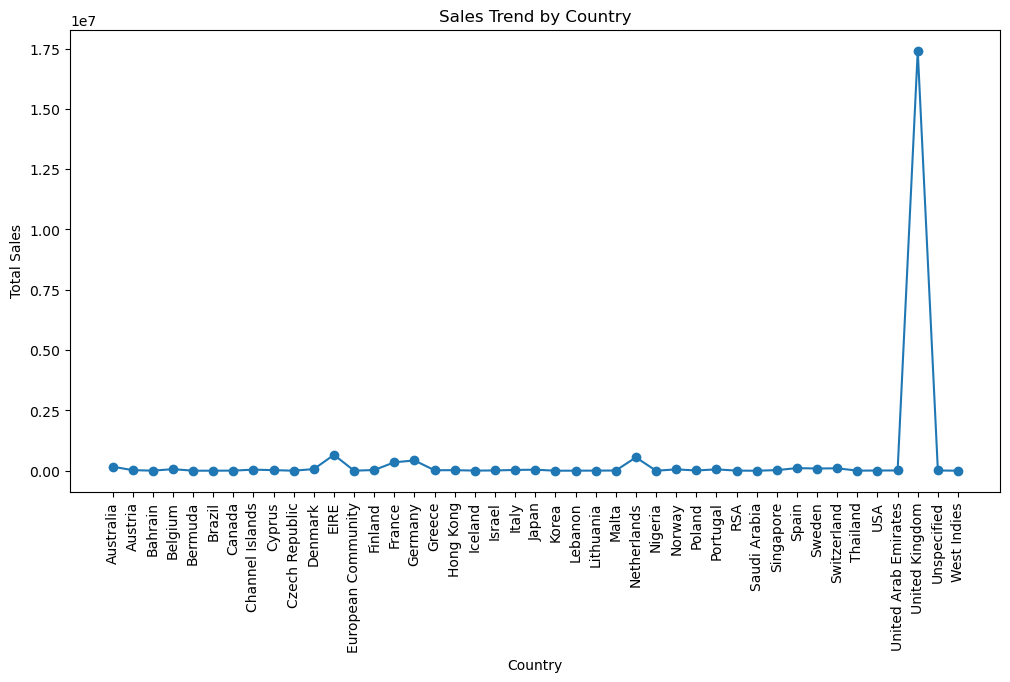

In [233]:
# Customer Demographics
# Distribution of Transaction per Country
display(df['Country'].value_counts())
df_country = df.groupby('Country').agg(
    total_quantity=('Quantity', 'sum'),
    total_sales=('TotalSales', 'sum'),
).reset_index()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
plt.plot(df_country['Country'].astype(str), df_country['total_sales'], marker='o')
plt.title("Sales Trend by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

In [234]:
df_grouped = df[df['Customer ID'] != 0]
df_grouped = df_grouped.groupby(['Customer ID']).agg(
    total_trans=('Invoice', 'count'),
    total_quantity=('Quantity', 'sum'),
    total_sales=('TotalSales', 'sum')
).reset_index()
display(df_grouped)
display(df_grouped.describe())

,Customer ID,total_trans,total_quantity,total_sales
0,12346,25,74239,77352.96
1,12347,222,2967,4921.53
2,12348,51,2714,2019.40
3,12349,175,1624,4428.69
4,12350,17,197,334.40
...,...,...,...,...
5874,18283,938,1679,2664.90
5875,18284,28,494,461.68
5876,18285,12,145,427.00
5877,18286,67,608,1296.43


,Customer ID,total_trans,total_quantity,total_sales
count,5879.000000,5879.000000,5879.000000,5879.000000
mean,15314.963259,132.587685,1790.890287,2955.362862
std,1715.636967,342.203171,8883.391212,14439.497874
min,12346.000000,1.000000,1.000000,0.000000
25%,13832.500000,20.000000,187.000000,342.230000
50%,15314.000000,52.000000,480.000000,867.110000
75%,16797.500000,138.000000,1350.500000,2248.110000
max,18287.000000,12435.000000,367833.000000,580987.040000


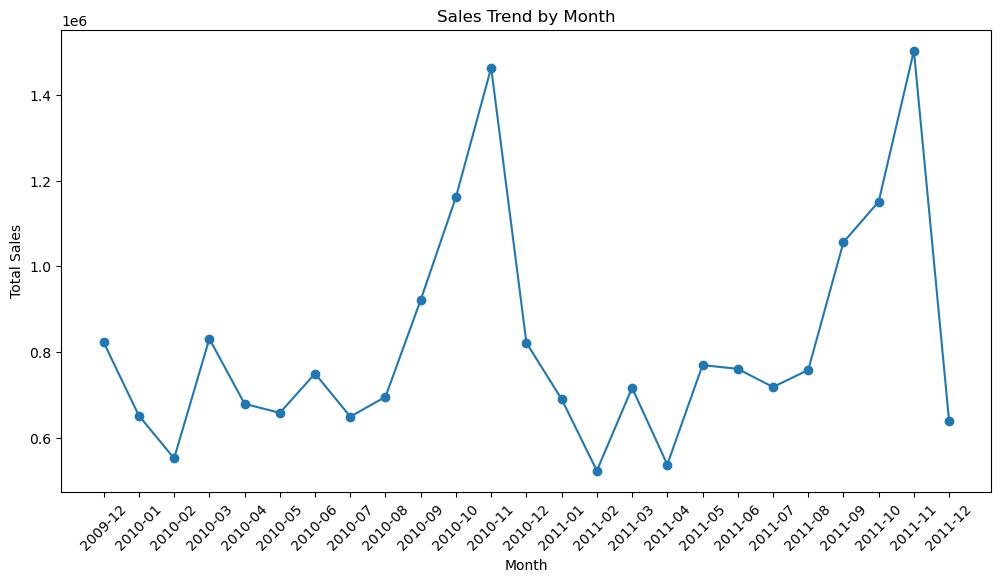

In [235]:
# Group sales by day
df['Month'] = df['InvoiceDate'].dt.to_period('M')
# Group by Month and calculate total sales (Quantity * UnitPrice)

df_monthly_sales = df.groupby('Month').agg(
    total_sales=('TotalSales', 'sum'),
    total_quantity=('Quantity', 'sum'),
).reset_index()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_sales['Month'].astype(str), df_monthly_sales['total_sales'], marker='o')
plt.title("Sales Trend by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

  CustomerCategory  Number of Purchases
0            Guest               231038
1       Registered               779483


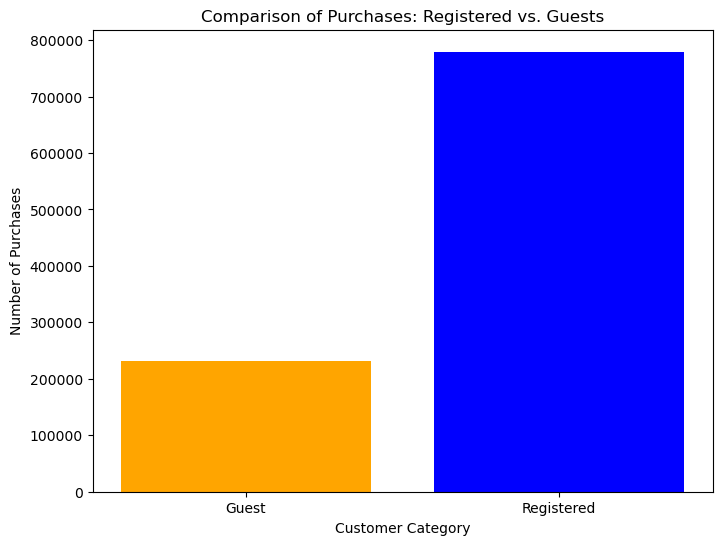

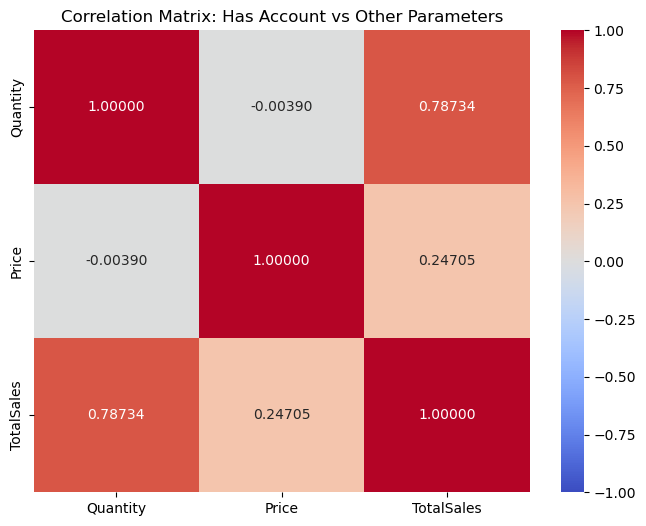

In [263]:
# Create a new column to categorize customers
df['CustomerCategory'] = df['Customer ID'].apply(lambda x: 'Guest' if x == 0 else 'Registered')

# Count the number of purchases for each category
purchase_counts = df.groupby('CustomerCategory').size().reset_index(name='Number of Purchases')

# Display the counts
print(purchase_counts)

# Visualize the comparison
plt.figure(figsize=(8, 6))
plt.bar(purchase_counts['CustomerCategory'], purchase_counts['Number of Purchases'], color=['orange', 'blue'])
plt.title('Comparison of Purchases: Registered vs. Guests')
plt.ylabel('Number of Purchases')
plt.xlabel('Customer Category')
plt.show()

correlation_data = df[['Quantity', 'Price', 'TotalSales']]

# Step 4: Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Step 5: Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.5f', vmin=-1, vmax=1)
plt.title("Correlation Matrix: Has Account vs Other Parameters")
plt.show()